In [35]:
import pandas as pd
import gc # Garbage Collector
import seaborn as sns

In [2]:

# Read data
train_identity = pd.read_csv('...ML Siraj/semana3/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('...ML Siraj/semana3/ieee-fraud-detection/train_transaction.csv')

In [3]:
# Dataframes shapes
print("Identity data    -->", train_identity.shape)
print("Transaction data -->", train_transaction.shape)

Identity data    --> (144233, 41)
Transaction data --> (590540, 394)


In [4]:
# Merge the data sets
full_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [5]:
# Full Data Shape
print("Full data   -->", full_data.shape)

Full data   --> (590540, 434)


In [6]:
del train_identity, train_transaction
gc.collect()

35

In [22]:
# look head data
full_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [8]:
fraud = full_data.loc[full_data['isFraud'] == 1]
non_fraud = full_data.loc[full_data['isFraud'] == 0]
print("Fraud data: ", len(fraud), " | Non-Fraud data:", len(non_fraud))


Fraud data:  20663  | Non-Fraud data: 569877


In [9]:
full_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


# PLOT DATA

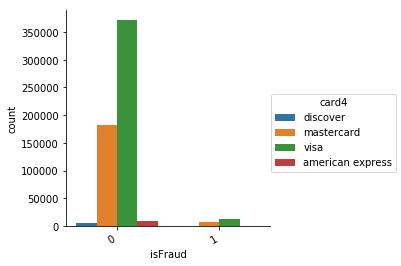

In [11]:
# Card vs Isfraud plot:
ax = sns.factorplot(x='isFraud',hue='card4', kind='count',data=full_data,orient="h")
ax.fig.autofmt_xdate()


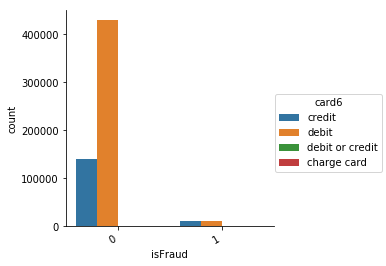

In [12]:
# Card vs Isfraud plot:
ax_2 = sns.factorplot(x='isFraud',hue='card6', kind='count',data=full_data,orient="h")
ax_2.fig.autofmt_xdate()


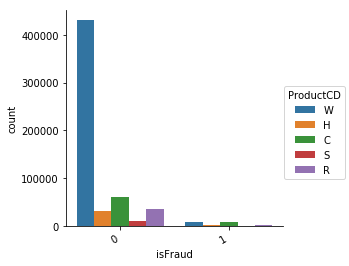

In [13]:
# Card vs Isfraud plot:
ax_2 = sns.factorplot(x='isFraud',hue='ProductCD', kind='count',data=full_data,orient="h")
ax_2.fig.autofmt_xdate()

In [66]:
# Categorical Variables
full_data[full_data.select_dtypes(include=['object']).columns].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [101]:
full_data.shape

(590540, 434)

In [201]:
s = full_data

# delete null values and select columns

In [202]:
columns_nulls=pd.DataFrame({"nulls_values_count":s.isnull().sum()})

In [203]:
columns_nulls["p_of_nulls"]=columns_nulls["nulls_values_count"]/len(s)

In [208]:
# index of selected columns with less nulls values
columns_not_nulls = columns_nulls[columns_nulls["p_of_nulls"]<0.01].index 
print(columns_not_nulls)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card3', 'card4', 'card5', 'card6',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=111)


In [209]:
# final dataset
fd = s[s.columns.intersection(columns_not_nulls)]
fd.shape

(590540, 111)

In [210]:
# transform categorical variables:
col = list(fd[fd.select_dtypes(include=['object']).columns])
transform_full_data= pd.get_dummies(fd, columns=col)


In [211]:
transform_full_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,card5,C1,C2,C3,...,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit
0,2987000,0,86400,68.5,13926,150.0,142.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,1,0,0
1,2987001,0,86401,29.0,2755,150.0,102.0,1.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.0,4663,150.0,166.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
3,2987003,0,86499,50.0,18132,150.0,117.0,2.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
4,2987004,0,86506,50.0,4497,150.0,102.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [212]:
# ds = pd.concat([fd,transform_full_data], axis = 1)
ds = transform_full_data

In [198]:
# ds=ds._get_numeric_data()

In [213]:
ds.dropna(how='any', inplace=True)
ds.isnull().sum()


TransactionID             0
isFraud                   0
TransactionDT             0
TransactionAmt            0
card1                     0
card3                     0
card5                     0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
C9                        0
C10                       0
C11                       0
C12                       0
C13                       0
C14                       0
D1                        0
V95                       0
V96                       0
V97                       0
V98                       0
V99                       0
V100                      0
V101                      0
V102                      0
                         ..
V305                      0
V306                      0
V307                      0
V308                      0
V309                

In [214]:
ds.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card3,card5,C1,C2,C3,...,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit
0,2987000,0,86400,68.5,13926,150.0,142.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,1,0,0
1,2987001,0,86401,29.0,2755,150.0,102.0,1.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.0,4663,150.0,166.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0,0,1,0
3,2987003,0,86499,50.0,18132,150.0,117.0,2.0,5.0,0.0,...,0,1,0,0,1,0,0,0,1,0
4,2987004,0,86506,50.0,4497,150.0,102.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [217]:
# dataframes input 
x_full_data = ds.drop(["isFraud"], axis=1)
y_full_data = ds["isFraud"]

# LR MODEL

In [218]:
# Start Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [219]:
X_train,X_test,y_train,y_test=train_test_split(x_full_data,y_full_data,test_size=0.75)

In [220]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
lr.score(X_test, y_test)

0.9651012219587817

In [222]:
y_pred=lr.predict(X_test)

In [223]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,423332,423332
1,15308,15308
All,438640,438640


In [224]:
recall_score(y_test, y_pred)

0.0

In [225]:
accuracy_score(y_test, y_pred)

0.9651012219587817